### Visualizations

1. Does Population Size alone affect Hospital Patient Experience?
2. Does # of Survey Responders alone affect Hospital Patient Experience? (total completed surveys vs county avg rating, avg response rate vs county avg rating, avg completed survey vs county avg rating)

--- hospital count per county

In [36]:
# import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# read in final csv
data_df = pd.read_csv('Resources/final_cleaned_data.csv', index_col=0)

data_df.head()

,State,County,City,Hospital,Location,Patient Rating,Completed Surveys,Survey Response Rate (%),Deaths,Population,Crude Rate,Age Adjusted Rate,% of Total Deaths
0,MN,HENNEPIN,ROBBINSDALE,NORTH MEMORIAL MEDICAL CENTER,"3300 OAKDALE NORTH\nROBBINSDALE, MN\n(45.01421...",3,957,26,8557,1232483,694.29,634.22,0.31
1,MN,HENNEPIN,MINNEAPOLIS,HENNEPIN COUNTY MEDICAL CENTER 1,"701 PARK AVENUE\nMINNEAPOLIS, MN\n(44.97285, -...",2,694,13,8557,1232483,694.29,634.22,0.31
2,MN,HENNEPIN,SAINT LOUIS PARK,PARK NICOLLET METHODIST HOSPITAL,"6500 EXCELSIOR BLVD\nSAINT LOUIS PARK, MN\n(44...",3,1199,34,8557,1232483,694.29,634.22,0.31
3,MN,HENNEPIN,MINNEAPOLIS,ABBOTT NORTHWESTERN HOSPITAL,"800 EAST 28TH STREET\nMINNEAPOLIS, MN\n(44.951...",3,865,35,8557,1232483,694.29,634.22,0.31
4,MN,HENNEPIN,MINNEAPOLIS,"UNIVERSITY OF MINNESOTA MEDICAL CENTER, FAIRVIEW","2450 RIVERSIDE AVENUE\nMINNEAPOLIS, MN\n(44.96...",3,515,25,8557,1232483,694.29,634.22,0.31


In [78]:
# make county level df with average rating, total completed surveys, avg completed surveys, avg response rate, 
#population, crude rate, adj crude rate

# group by state and county
grouper = data_df.groupby(["State", "County"])

# get avg rating, survey, and response rate
rating = grouper[["Patient Rating", "Completed Surveys", "Survey Response Rate (%)"]].mean()
rating.reset_index(inplace=True)

# get total completed surveys
survey = grouper["Completed Surveys"].sum().to_frame()
survey.reset_index(inplace=True)

# get mortality and population data
mortality = grouper[["Population", "Crude Rate", "Age Adjusted Rate"]].mean()
mortality.reset_index(inplace=True)

#merge df
county_df = pd.merge(rating, survey, on=["State", "County"], how="inner")
county_df = county_df.rename(columns={"Patient Rating" : "Average Patient Rating", "Completed Surveys_x":"Average Completed Surveys", 
                                      "Survey Response Rate (%)": "Average Survey Response Rate (%)", "Completed Surveys_y":"Total Completed Surveys"})

county_df = pd.merge(county_df, mortality, on =["State", "County"], how="inner")

county_df.head()

,State,County,Average Patient Rating,Average Completed Surveys,Average Survey Response Rate (%),Total Completed Surveys,Population,Crude Rate,Age Adjusted Rate
0,AL,AUTAUGA,4.0,579.0,25.0,579,55416,938.36,884.39
1,AL,BALDWIN,4.0,758.0,33.0,2274,208563,946.48,716.92
2,AL,BARBOUR,3.0,184.0,34.0,184,25965,985.94,800.68
3,AL,BLOUNT,4.0,128.0,29.0,128,57704,1207.89,989.37
4,AL,BUTLER,4.0,158.0,31.0,158,19998,1375.14,1014.00


In [80]:
county_df["Population (Hundred Thousands)"] = county_df["Population"] / 1000000
county_df.head()

,State,County,Average Patient Rating,Average Completed Surveys,Average Survey Response Rate (%),Total Completed Surveys,Population,Crude Rate,Age Adjusted Rate,Population (Hundred Thousands)
0,AL,AUTAUGA,4.0,579.0,25.0,579,55416,938.36,884.39,0.055416
1,AL,BALDWIN,4.0,758.0,33.0,2274,208563,946.48,716.92,0.208563
2,AL,BARBOUR,3.0,184.0,34.0,184,25965,985.94,800.68,0.025965
3,AL,BLOUNT,4.0,128.0,29.0,128,57704,1207.89,989.37,0.057704
4,AL,BUTLER,4.0,158.0,31.0,158,19998,1375.14,1014.00,0.019998


In [81]:
# export to csv
county_df.to_csv("Resources/county_data.csv")

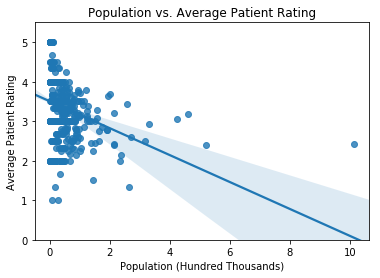

In [84]:
# Does Population Size alone affect Hospital Patient Experience?
sns.regplot(x="Population (Hundred Thousands)", y="Average Patient Rating", data=county_df)
plt.title("Population vs. Average Patient Rating")
plt.ylim(0, 5.5)
plt.show()
None